<a href="https://colab.research.google.com/github/rolandhaidari/nlp-course/blob/master/labs/notebooks_2024/colab_lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome

<table>
      <tr>
    <td style="text-align:center">Ruchira Dhar</td>
    <td style="text-align:center">Christian Mølholt Jensen</td>
    <td style="text-align:center">Thomas Brun Lau Christensen</td>
    <td style="text-align:center">Zixuan Xu</td>
  </tr>
    <tr>
  <td><img src="https://github.com/rolandhaidari/nlp-course/blob/master/img/Ruchira.jpeg?raw=1" width="200px" /></td>
  <td><img src="https://github.com/rolandhaidari/nlp-course/blob/master/img/Christian.jpg?raw=1" width="200px" /></td>
  <td><img src="https://github.com/rolandhaidari/nlp-course/blob/master/img/Thomas.jpeg?raw=1" width="200px" /></td>
  <td><img src="https://github.com/rolandhaidari/nlp-course/blob/master/img/Zixuan.jpeg?raw=1" width="200px" /></td>
    </tr>
</table>

## Lab Schedule
    
- Lab Sessions:
    - Group 1: Mondays, 10-12 in the old library (4-0-17), Universitetsparken 1, Weeks 37-41 + 43-44
    - Group 2: Fridays, 10-12 in the old library (4-0-17), Universitetsparken 1, Weeks 36-41 + 43-44

We have assigned you to one of two lab session groups based on your answers to the [Getting to Know You survey](https://absalon.instructure.com/courses/52205/quizzes/62668). Please note that this is a preliminary assignment.

## Lab Agenda

- Introduction to useful tools for the course (Jupyter, Google Colab)
- Setting up the course environment
- Tokenisation
- Introduction to PyTorch
- Questions about the course project / group work on the  project

## Introduction to Jupyter

Jupyter is an open-source web app that combines visualisations, narrative text, mathematical equations, and other rich media in a single document.

* Creating new notebook - from the menu File -> New Notebook. Once created, you can rename the notebook by clicking on its name and edit its content by adding (plus button), deleting or editing cells.

In [1]:
print("Hello, World!"); # this is a code block

Hello, World!


This is a _Markdown block_ where you can write text.

You can get help about a method with __(<kbd>Shift</kbd> + <kbd>Tab</kbd>)__

__(<kbd>Shift</kbd> + <kbd>Enter</kbd>)__ executes the text/code blocks

While the a code cell is being executed, you'll see a star on the right side of the cell.

In [2]:
!python --version # you can also write shell commands in code blocks

Python 3.10.12


In [3]:
!pip3 install nltk # you can also install new libraries

We can also create visualisations and save them.

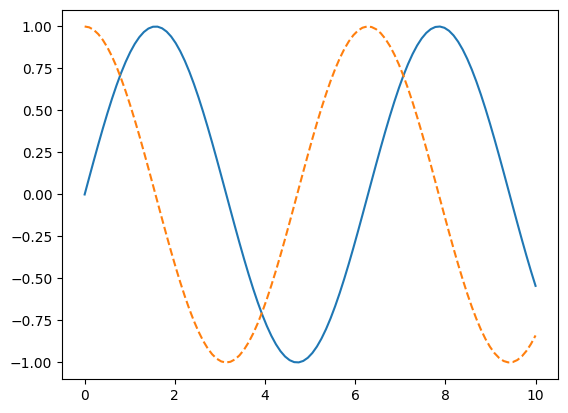

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

In [5]:
fig.savefig('my_figure.png')

In [6]:
import time
%time time.sleep(10) # this is some jupyter magic

CPU times: user 50.4 ms, sys: 9.6 ms, total: 60 ms
Wall time: 10 s


All Jupyter magic commands are described [here](https://ipython.readthedocs.io/en/stable/interactive/magics.html).

In [7]:
# Magic used in the notebooks :

# automatically re-load imported modules every time before executing the Python code typed
%load_ext autoreload
%autoreload 2

# automatically include matplotlib plots in the frontend of the notebook and save them with the notebook
%matplotlib inline

### Kernels
Behind every notebook runs a **kernel**. When you run a code cell, that code is executed within the kernel. The kernel is build with a specific Python version. Any output is returned back to the cell to be displayed. The kernel’s state persists over time and between cells — it pertains to the document as a whole and not individual cells.

In [8]:
import nltk
nltk.download('punkt')

text = "Time flies like an arrow."

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
nltk.tokenize.word_tokenize(text)

['Time', 'flies', 'like', 'an', 'arrow', '.']

### Checkpoints

When you create a notebook, a checkpoint file is also saved in a hidden directory called .ipynb_checkpoints. Every time you manually save the notebook (__(<kbd>command</kbd> + <kbd>S</kbd>)__), the checkpoint file updates. Jupyter autosaves your work on occasion, which only updates the .ipynb file but not the checkpoint. You can revert back to the latest checkpoint using File -> Revert to Checkpoint.

### WARNING

Code in Jupyter notebooks can be executed in a non-sequential order. Cells can get deleted.
Notebooks are dangerous unless you run each cell exactly once and sequentially!

To restart the state of the notebook you can select:
**"Kernel -> Restart & Run All"**

This is especially good to do before sharing your notebook with someone else.

References:
- https://www.dataquest.io/blog/jupyter-notebook-tutorial/
- https://nbviewer.jupyter.org/github/cgpotts/cs224u/blob/master/tutorial_jupyter_notebooks.ipynb

---
## Introduction to Colab https://colab.research.google.com/

Colab allows to run notebooks on the Google Cloud with free access to GPUs and TPUs. You can run the same commands reviewed above in Colab as well.

The notebooks can be shared with other people and you can leave comments and control permissions on it.

To run the notebook on GPU/TPU you have to select from the menu Runtime->Change Runtime type, which will be None (CPU) by default.

### Collaboration options:
- Share button in the upper right corner.
- File->Make a Copy creates a copy of the notebook in Drive.
- File->Save saves the File to Drive and pins a version to the checkpoint and you can later restore version from File->Revision history
- GitHub - you can open notebooks hosted in GitHub, this will open a new editable version of the notebook and any changes won't override the GitHub version. If you want to save the changes to GitHub select File->Make a copy to GitHub.



### Using a custom dataset
**The code cells below have to be run in a Colab environment!**
#### Uploading files from your local file system
files.upload returns a dictionary of the files which were uploaded. The dictionary is keyed by the file name and values are the data which were uploaded.

In [ ]:
# this code cell has to be run in Colab environment
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

KeyboardInterrupt: 

### files.download will invoke a browser download of the file to your local computer.

In [ ]:
from google.colab import files

with open('example.txt', 'w') as f:
    f.write('some content')

files.download('example.txt')

### Mounting Google Drive locally
You can mount your Google Drive in the notebook and use all of the files available there.

In [ ]:
from google.colab import drive
drive.mount('/content/drive') # this will trigger permission prompts

In [ ]:
with open('/content/drive/My Drive/foo.txt', 'w') as f:
    f.write('Hello Google Drive!')
!ls /content/drive/My\ Drive/ | wc -l

In [ ]:
drive.flush_and_unmount()
print('All changes made in this colab session should now be visible in Drive.')

In [ ]:
!pip3 freeze # contains a lot of pre-installed packages

References:
- Colab guides and examples : https://colab.research.google.com/notebooks/intro.ipynb?hl=en
- Integration with GitHub: https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb#scrollTo=WzIRIt9d2huC
- External data handling: https://colab.research.google.com/notebooks/io.ipynb#scrollTo=G5IVmR8S9SeF

-----

## Python tutorials

* Go through this [Notebook](../exercises/python_intro.ipynb) with elementary Python syntax.

* [An Informal Introduction to Python](https://docs.python.org/3/tutorial/introduction.html)

* [Python for Beginners](https://www.python.org/about/gettingstarted/)

* [Learn Python in 10 minutes](https://www.stavros.io/tutorials/python/)

* [LOADS of others](https://www.google.co.uk/search?q=python+tutorial)

-----

## stat-nlp-book setup

### On your personal computer

Go to https://github.com/coastalcph/nlp-course/blob/master/INSTALL.md and follow the readme to set up the stat-nlp-book.

### On Microsoft Azure

If you feel adventurous, and want to set up your own Virtual Machine with stat-nlp-book, follow the [Azure tutorial](../tutorials/azure_tutorial.ipynb)

## Additional Info

### Docker commands
* Get a list of the currently running containers <br>
<code>docker ps -q</code> <br>
* Run shell commands in your container by first getting the id of the container with above command and then: <br>
<code>docker exec -it _container-id_ _command_</code> <br>
e.g. <code>docker exec -it 8c16b8de4771 python --version</code>


### Managing your changes

There are several ways to keep your changes within the official repo organised. Some of them are:
* Create your own [fork](https://help.github.com/en/articles/fork-a-repo)
of the repo. The fork can be [synced](https://help.github.com/en/articles/syncing-a-fork?query=f) with the official course repo when new changes are available. Meanwhile, you can also maintain your changes in your forked repo.
* Another option is to keep your changes only in a local branch (<code>git checkout -b _your-branch-name_</code>) on your computer. Each time there is a change in the course repo, you can pull the repo and merge the changes in your branch (<code>git merge origin/master</code>)

----

## Tokenisation

Tokenisation is an important pre-processing step for NLP models.

You can tokenise text at different levels - split to sentences, tokens, subwords, etc.

There are a lot of corner cases, language-specific and/or domain-specific cases, which have to handled in different ways.


In [ ]:
import re

text_sentences = "The office is open between 10 a.m. and 1 p.m. every day... Please, be respective of the hours."
re.split('(\.|!|\?)', text_sentences)

['The office is open between 10 a',
 '.',
 'm',
 '.',
 ' and 1 p',
 '.',
 'm',
 '.',
 ' every day',
 '.',
 '',
 '.',
 '',
 '.',
 ' Please, be respective of the hours',
 '.',
 '']

Luckily, there are libraries providing tokenisation functionalities that handle most of the cases. Let's look two of the most common libraries for tokenisation:

### Spacy

In [ ]:
# download the language models, this can be done for other languages as well
!python -m spacy download en_core_web_sm # You might have to restart the notebook if the file cannot be found
!python -m spacy download fr_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 20.2 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 33.2 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')


In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp(text_sentences)
list(doc.sents)

[The office is open between 10 a.m. and 1 p.m. every day...,
 Please, be respective of the hours.]

### NLTK

In [ ]:
import nltk

nltk.tokenize.sent_tokenize(text_sentences)

['The office is open between 10 a.m. and 1 p.m. every day...',
 'Please, be respective of the hours.']

#### Word-level tokenisation

In [ ]:
text = "Mr. O'Neill thinks that the boys' stories about Chile's capital aren't amusing... Good muffins cost $3.88 in New York. Please buy me two of them!!! Thanks.."
text_tweet = "https://t.co/9z2J3P33Uc Hey @NLPer! This is a #NLProc tweet :-D"
noisy_tweet = "UserAnonym123 What's your timezone_!@# !@#$%^&*()_+ 0123456"

print('Common English tokenisation')
print(nltk.word_tokenize(text))
print([token.text for token in nlp(text)])

print('\nTweet tokenisation')
print(nltk.word_tokenize(text_tweet))
print([token.text for token in nlp(text_tweet)])

print('\nTokenisation of a noisy tweet')
print(nltk.word_tokenize(noisy_tweet))
print([token.text for token in nlp(noisy_tweet)])

Common English tokenisation
['Mr.', "O'Neill", 'thinks', 'that', 'the', 'boys', "'", 'stories', 'about', 'Chile', "'s", 'capital', 'are', "n't", 'amusing', '...', 'Good', 'muffins', 'cost', '$', '3.88', 'in', 'New', 'York', '.', 'Please', 'buy', 'me', 'two', 'of', 'them', '!', '!', '!', 'Thanks..']
['Mr.', "O'Neill", 'thinks', 'that', 'the', 'boys', "'", 'stories', 'about', 'Chile', "'s", 'capital', 'are', "n't", 'amusing', '...', 'Good', 'muffins', 'cost', '$', '3.88', 'in', 'New', 'York', '.', 'Please', 'buy', 'me', 'two', 'of', 'them', '!', '!', '!', 'Thanks', '..']

Tweet tokenisation
['https', ':', '//t.co/9z2J3P33Uc', 'Hey', '@', 'NLPer', '!', 'This', 'is', 'a', '#', 'NLProc', 'tweet', ':', '-D']
['https://t.co/9z2J3P33Uc', 'Hey', '@NLPer', '!', 'This', 'is', 'a', '#', 'NLProc', 'tweet', ':-D']

Tokenisation of a noisy tweet
['UserAnonym123', 'What', "'s", 'your', 'timezone_', '!', '@', '#', '!', '@', '#', '$', '%', '^', '&', '*', '(', ')', '_+', '0123456']
['UserAnonym123', 'Wha

Both libraries perform almost similar for tokenising English common text, so it depends which library you'll use for other features.

When it comes to tweets, the nltk default tokeniser performs bad, but NLTK also provides the TweetTokenizer that is suited for tweet tokenisation.

In [ ]:
tweet_tokenizer = nltk.tokenize.TweetTokenizer()
print(tweet_tokenizer.tokenize(text_tweet))
print(tweet_tokenizer.tokenize(noisy_tweet))

['https://t.co/9z2J3P33Uc', 'Hey', '@NLPer', '!', 'This', 'is', 'a', '#NLProc', 'tweet', ':-D']
['UserAnonym', '123', "What's", 'your', 'timezone', '_', '!', '@', '#', '!', '@', '#', '$', '%', '^', '&', '*', '(', ')', '_', '+', '0123456']


As you saw, the above tokenisers tokenise negation contractions like "are", "n't", which is per the the Penn Treebank guidelines. Such tokenisation can be useful when building sentiment classification or information extraction.

Question:
- How should we split "I bought a 12-ft boat!"? In 1, 2, or 3 tokens?
- How should we tokenise "It is a 2850m distance flight.", "The maximum speed on the autobahn is 130km/h."?

There is again a rule that units are split from numerical values. Let's test the performance of the tokenisers:

In [ ]:
print('Spacy tokeniser')
print([token.text for token in nlp("I bought a 12-ft boat!")])
print([token.text for token in nlp("It is a 2850m distance flight.")])
print([token.text for token in nlp("The maximum speed on the autobahn is 130km/h.")])

print('\nNLTK simple tokeniser')
print([nltk.tokenize.word_tokenize("I bought a 12-ft boat!")])
print([nltk.tokenize.word_tokenize("It is a 2850m distance flight.")])
print([nltk.tokenize.word_tokenize("The maximum speed on the autobahn is 130km/h.")])

Spacy tokeniser
['I', 'bought', 'a', '12', '-', 'ft', 'boat', '!']
['It', 'is', 'a', '2850', 'm', 'distance', 'flight', '.']
['The', 'maximum', 'speed', 'on', 'the', 'autobahn', 'is', '130', 'km/h', '.']

NLTK simple tokeniser
[['I', 'bought', 'a', '12-ft', 'boat', '!']]
[['It', 'is', 'a', '2850m', 'distance', 'flight', '.']]
[['The', 'maximum', 'speed', 'on', 'the', 'autobahn', 'is', '130km/h', '.']]


#### Language dependent tokenisation

While some languages have similar rules for tokenisation, other languages are quite different.
In French, words originally composed of more than one lexical unit that nowadays form a single lexical unit and should thus be recognized as a single token, where an apostrophe should be used to split the word in some cases, but not in all.

The following sentence "On nous dit qu’aujourd’hui c’est le cas, encore faudra-t-il l’évaluer.", which means "We are told that this is the case today, it still needs to be assessed." has the following correct tokenisation:

'On', 'nous', 'dit', 'qu’', 'aujourd’hui', 'c’', 'est', 'le', 'cas', ',', 'encore', 'faudra', '-t-il', 'l’', 'évaluer', '.'

Explanation:
- words originally composed of more than one lexical unit that nowadays form a single lexical unit and should thus be recognized as a single token like 'aujourd’hui'
- qu’aujourd’hui (that today) - today is in contracted form (qu’) and has to be separated from the rest of the word
- c'est (this is) is ce (C') combined with est and has to be split in two words
- l’évaluer (evaluate it) is two words, where one is in contracted form and has to be separated
- faudra-t-il (will it take) - consists of will (faudra), -t is used to prevent two vowels from clashing and should not be tokenised

In [ ]:
print([nltk.tokenize.word_tokenize("On nous dit qu’aujourd’hui c’est le cas, encore faudra-t-il l’évaluer.")])
print([token.text for token in nlp("On nous dit qu’aujourd’hui c’est le cas, encore faudra-t-il l’évaluer.")])

[['On', 'nous', 'dit', 'qu', '’', 'aujourd', '’', 'hui', 'c', '’', 'est', 'le', 'cas', ',', 'encore', 'faudra-t-il', 'l', '’', 'évaluer', '.']]
['On', 'nous', 'dit', 'qu’aujourd’hui', 'c’est', 'le', 'cas', ',', 'encore', 'faudra', '-', 't', '-', 'il', 'l’évaluer', '.']


Let's use the language-specific tokenisation:

In [ ]:
nlp_fr = spacy.load("fr_core_news_sm")
print([token.text for token in nlp_fr("On nous dit qu’aujourd’hui c’est le cas, encore faudra-t-il l’évaluer.")])
nltk.tokenize.word_tokenize("On nous dit qu’aujourd’hui c’est le cas, encore faudra-t-il l’évaluer.", language='french')

['On', 'nous', 'dit', 'qu’', 'aujourd’hui', 'c’', 'est', 'le', 'cas', ',', 'encore', 'faudra', '-t', '-il', 'l’', 'évaluer', '.']


['On',
 'nous',
 'dit',
 'qu',
 '’',
 'aujourd',
 '’',
 'hui',
 'c',
 '’',
 'est',
 'le',
 'cas',
 ',',
 'encore',
 'faudra-t-il',
 'l',
 '’',
 'évaluer',
 '.']

### Transformers

[HuggingFace's](https://huggingface.co/docs/transformers/index) "transformers" is a python package for training, using and deploying Transformer-based models (more on that in future lectures). Each transformer model (e.g. BERT, RoBERTa) has its own tokenisation module that should be used together with the model. That is, to use the transformer model "BERT", one must tokenise its inputs with the BERT-tokeniser.

In [ ]:
from transformers import AutoTokenizer
bert_tokeniser = AutoTokenizer.from_pretrained("bert-base-uncased")  # The tokeniser of the model "bert-base-uncased"

In [ ]:
tokens = bert_tokeniser.tokenize("The maximum speed on the autobahn is 130km/h.")
print(tokens)

['the', 'maximum', 'speed', 'on', 'the', 'auto', '##bahn', 'is', '130', '##km', '/', 'h', '.']


The "bert-base-uncased" tokeniser works differently from the tokenisers of nltk and spacy. Instead of splitting a sentence following a set of rules, it uses a (learned) vocabulary, a set of words that it knows. The tokeniser tries to break the sentence into tokens from its vocabulary. If the tokeniser encounters a work that does not appear in the vocabulary, the work will be split into "word-pieces", where each word piece belongs to the vocabulary. For example, the word "autobahn" is not part of the vocabulary, so the tokeniser split it into "auto" and "bahn" (the "##" means that "bahn" should be merged with the token that comes before it when reconstructing the original sentence from the tokens).

In [ ]:
print("autobahn" in bert_tokeniser.vocab)
print("auto" in bert_tokeniser.vocab)
print("bahn" in bert_tokeniser.vocab)

False
True
True


"bert-base-uncased" is an English only model, so it can't deal well with sentences in other languages:

In [ ]:
tokens = bert_tokeniser.tokenize("On nous dit qu’aujourd’hui c’est le cas, encore faudra-t-il l’évaluer.")
print(tokens)

['on', 'no', '##us', 'di', '##t', 'qu', '’', 'au', '##jou', '##rd', '’', 'hui', 'c', '’', 'est', 'le', 'cas', ',', 'encore', 'fa', '##ud', '##ra', '-', 't', '-', 'il', 'l', '’', 'eva', '##lu', '##er', '.']


CamemBERT, however, is a French language model, so it can tokenise the sentence in a more meaningful (but far from perfect) way.
Here, '-' means that this token starts a new word.

In [ ]:
camembert_tokeniser = AutoTokenizer.from_pretrained("camembert-base")
tokens = camembert_tokeniser.tokenize("On nous dit qu’aujourd’hui c’est le cas, encore faudra-t-il l’évaluer.")
print(tokens)

['▁On', '▁nous', '▁dit', '▁qu', '’', 'aujourd', '’', 'hui', '▁c', '’', 'est', '▁le', '▁cas', ',', '▁encore', '▁faudra', '-', 't', '-', 'il', '▁l', '’', 'évaluer', '.']


Some models are multilingual, and their tokenisers can process sentences from several languages. "bert-base-multilingual-uncased" (M-BERT) and "xlm-roberta-base" (XLM-RoBERTa) were trained on over 100 different languages!

In [ ]:
mbert_tokeniser = AutoTokenizer.from_pretrained("bert-base-multilingual-uncased")
en_tokens = mbert_tokeniser.tokenize("The maximum speed on the autobahn is 130km/h.")

fr_tokens = mbert_tokeniser.tokenize("On nous dit qu’aujourd’hui c’est le cas, encore faudra-t-il l’évaluer.")

heb_tokens = mbert_tokeniser.tokenize("אחד הדברים שאני הכי אוהב בקופנהגן זה מאפים עם הל")
print("en:", en_tokens)
print("fr:", fr_tokens)
print("heb:", heb_tokens)

en: ['the', 'maximum', 'speed', 'on', 'the', 'autobahn', 'is', '130', '##km', '/', 'h', '.']
fr: ['on', 'nous', 'dit', 'qu', '[UNK]', 'aujourd', '[UNK]', 'hui', 'c', '[UNK]', 'est', 'le', 'cas', ',', 'encore', 'fa', '##udra', '-', 't', '-', 'il', 'l', '[UNK]', 'eva', '##lue', '##r', '.']
heb: ['אחד', 'הדבר', '##ים', 'ש', '##אני', 'ה', '##כי', 'או', '##ה', '##ב', 'ב', '##קו', '##פנה', '##גן', 'זה', 'מ', '##א', '##פים', 'עם', 'ה', '##ל']


In [ ]:
xlm_tokeniser = AutoTokenizer.from_pretrained("xlm-roberta-base")
en_tokens = xlm_tokeniser.tokenize("The maximum speed on the autobahn is 130km/h.")

fr_tokens = xlm_tokeniser.tokenize("On nous dit qu’aujourd’hui c’est le cas, encore faudra-t-il l’évaluer.")

heb_tokens = xlm_tokeniser.tokenize("אחד הדברים שאני הכי אוהב בקופנהגן זה מאפים עם הל")
print("en:", en_tokens)
print("fr:", fr_tokens)
print("heb:", heb_tokens)

en: ['▁The', '▁maximum', '▁speed', '▁on', '▁the', '▁auto', 'bahn', '▁is', '▁130', 'km', '/', 'h', '.']
fr: ['▁On', '▁nous', '▁dit', '▁qu', '’', 'aujourd', '’', 'hui', '▁c', '’', 'est', '▁le', '▁cas', ',', '▁encore', '▁faudra', '-', 't', '-', 'il', '▁l', '’', 'évaluer', '.']
heb: ['▁אחד', '▁הדברים', '▁שאני', '▁הכי', '▁אוהב', '▁בקו', 'פנה', 'גן', '▁זה', '▁מא', 'פים', '▁עם', '▁הל']


#### References:
- Introduction to Spacy and its features: https://spacy.io/usage/spacy-101
- NLTK tokenisation functionalities: https://www.nltk.org/api/nltk.tokenize.html
- HuggingFace's transformers and tokenisers: https://huggingface.co/docs/transformers/main_classes/tokenizer
- On rules and different languages: http://ceur-ws.org/Vol-2226/paper9.pdf
- Why do we need language-specific tokenisation: https://stackoverflow.com/questions/17314506/why-do-i-need-a-tokenizer-for-each-language

---
## Introduction to PyTorch https://pytorch.org/

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(123)

### Dataset and Bag-of-Words

In [ ]:
data = [("me gusta comer en la cafeteria".split(), "SPANISH"),
        ("Give it to me".split(), "ENGLISH"),
        ("No creo que sea una buena idea".split(), "SPANISH"),
        ("No it is not a good idea to get lost at sea".split(), "ENGLISH")]

test_data = [("Yo creo que si".split(), "SPANISH"),
             ("it is lost on me".split(), "ENGLISH")]
label_to_ix = {"SPANISH": 0, "ENGLISH": 1}

Typically a common way to read in data in PyTorch is to use the following classes: `torch.utils.data.Dataset` and `torch.utils.data.DataLoader`. Since today we work with a tiny dataset, we omit this part.

Now we represent the data as Bag-of-Words (BoW) which is a simple way of extracting features from text describing the occurrence of words within a document. Intuitevely, similar documents have similar content.

In [ ]:
# Function to map each word in the vocab to an unique integer
# Indexing the Bag of words vector
word_to_ix = {}
for sent, _ in data + test_data:
    for word in sent:
        if word not in word_to_ix:
            word_to_ix[word] = len(word_to_ix)
print(word_to_ix)

{'me': 0, 'gusta': 1, 'comer': 2, 'en': 3, 'la': 4, 'cafeteria': 5, 'Give': 6, 'it': 7, 'to': 8, 'No': 9, 'creo': 10, 'que': 11, 'sea': 12, 'una': 13, 'buena': 14, 'idea': 15, 'is': 16, 'not': 17, 'a': 18, 'good': 19, 'get': 20, 'lost': 21, 'at': 22, 'Yo': 23, 'si': 24, 'on': 25}


In [ ]:
VOCAB_SIZE = len(word_to_ix)
NUM_LABELS = 2

### Custom Classifier

Our classifier inherits from the `nn.Module` class which provides an interface to important methods used for constructing and working with our models.

Here, we will implement a custom multi-layer feed forward neural network. In our example, we calculate:
$$
y = final(nonlinear(linear(BoW))
$$
where nonlinear denotes a non-linear function (we use [`nn.ReLU`](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html)) and the first and final layer are both linear functions implemented with`nn.Linear`. In practice, we create a `nn.Module` containing the definition of our model architecture in the `__init__` function. The `__forward__` function defines how tensors are processed by our model.

In [ ]:
class BoWClassifier(nn.Module):

    def __init__(self, num_labels, vocab_size, num_hidden = 2):
        # Calls the init function of nn.Module.
        super(BoWClassifier, self).__init__()

        # Define the parameters that you need.
        self.linear = nn.Linear(vocab_size, num_hidden)
        # non-linearity (here it is also a layer!)
        self.nonlinear = nn.ReLU()
        # final affine transformation
        self.final = nn.Linear(num_hidden, num_labels)

    def forward(self, bow_vec):
        # Pass the input through the linear layer,
        # then pass that through log_softmax.
        # Many non-linearities and other functions are in torch.nn.functional
        return self.final(self.nonlinear(self.linear(bow_vec)))

In [ ]:
# Functions to create BoW vectors
def make_bow_vector(sentence, word_to_ix):
    vec = torch.zeros(len(word_to_ix))
    for word in sentence:
        vec[word_to_ix[word]] += 1
    return vec.view(1, -1)


def make_target(label, label_to_ix):
    return torch.LongTensor([label_to_ix[label]])

The `BoWClassifier` (or any other module you will create) stores knowledge of the models's parameters.

In [ ]:
model = BoWClassifier(NUM_LABELS, VOCAB_SIZE)

# The first output below is A, the second is b.
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[-0.0800,  0.0065, -0.0974,  0.0740, -0.1671,  0.1438, -0.1425, -0.1559,
         -0.1239,  0.0888, -0.0725,  0.0734, -0.1664, -0.1190, -0.0720, -0.0385,
         -0.1496,  0.1284, -0.0463,  0.0630,  0.1387,  0.0365,  0.0536,  0.1893,
         -0.0885,  0.0621],
        [-0.0873,  0.1402,  0.1566, -0.1808,  0.1674,  0.0936,  0.0855,  0.0807,
          0.1630, -0.0259, -0.1659, -0.0563, -0.1381,  0.0130, -0.0366, -0.1052,
         -0.0178,  0.1858, -0.0155,  0.0062, -0.0306,  0.0308,  0.1747,  0.1199,
          0.0696,  0.0426]], requires_grad=True)
Parameter containing:
tensor([0.0462, 0.0758], requires_grad=True)
Parameter containing:
tensor([[-0.0914, -0.6572],
        [-0.4373,  0.6036]], requires_grad=True)
Parameter containing:
tensor([ 0.0423, -0.5728], requires_grad=True)


We run the model on the test data before we train to compare with the results from a trained model.

In [ ]:
with torch.no_grad():
    for text, label in test_data:
        bow_vec = make_bow_vector(text, word_to_ix)
        log_probs = model(bow_vec)
        print(log_probs)

# Print the matrix column corresponding to "creo"
print(next(model.parameters())[:, word_to_ix["creo"]])

tensor([[ 3.6781e-04, -6.1148e-01]])
tensor([[-0.0398, -0.4974]])
tensor([-0.0725, -0.1659], grad_fn=<SelectBackward>)


### Training

We set our loss function to cross entropy which combines `nn.LogSoftmax()` and `nn.NLLLoss()` (negative log likelihood) and calculate gradients with stochastic gradient descent.

Usually we want to pass over the training data several times by setting a respective number of epochs. Since we have a tiny dataset, we will exaggerate with the number of epochs.

In [ ]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [ ]:
for epoch in range(200):
    for instance, label in data:
        # Step 1. Remember that PyTorch accumulates gradients.
        # We need to clear them out before each instance
        model.zero_grad()

        # Step 2. Make our BOW vector and also we must wrap the target in a
        # Tensor as an integer. For example, if the target is SPANISH, then
        # we wrap the integer 0. The loss function then knows that the 0th
        # element of the log probabilities is the log probability
        # corresponding to SPANISH
        bow_vec = make_bow_vector(instance, word_to_ix)
        target = make_target(label, label_to_ix)

        # Step 3. Run our forward pass.
        log_probs = model(bow_vec)

        # Step 4. Compute the loss, gradients, and update the parameters by
        # calling optimizer.step()
        loss = loss_function(log_probs, target)
        loss.backward()
        optimizer.step()

### Evaluation

Let's see if our model can now predict more accurately, if a sentence is written in English or Spanish!

Indeed, the log probability for Spanish is much higher for the first sentence, while the log probability for English is much higher for the second sentence in the test data!

In [ ]:
with torch.no_grad():
    for instance, label in test_data:
        bow_vec = make_bow_vector(instance, word_to_ix)
        log_probs = model(bow_vec)
        print(log_probs)

tensor([[ 1.3078, -1.9363]])
tensor([[-1.5922,  0.9361]])


In [ ]:
print(next(model.parameters())[:, word_to_ix["creo"]])

tensor([-0.0725, -0.2638], grad_fn=<SelectBackward>)


### Useful links
- PyTorch Tutorials:
https://pytorch.org/tutorials/index.html
- Introduction to Pytorch notebook from Stanford: https://nbviewer.jupyter.org/github/cgpotts/cs224u/blob/master/tutorial_pytorch.ipynb

----
## Course Project

* **Group project**, can be completed in a group of up to 3 students:

    * Released 3 September, **hand-in 1 November 17:00**
    * Joint report, contribution of each student should be stated clearly
    * Code to be uploaded as attachment
    * Individual grade for each group member, based on the quality and quantity of their contributions
    * Submission via Digital Exam
    * Consists of several parts tied to weekly lecture topics
    * AI assistance is allowed **with restrictions**
    * We cannot guarantee responses to queries about the project after 31 October 15:00
    * Finding a group:
       * Deadline for group forming: **9 September 17:00**
       * We offer to help you find a group -- fill in the Getting to Know You survey by the end of first lecture day, **3 September 17:00**
       * If you choose this option, you will be informed of your assigned group on **4 September**
       * You can still change groups afterwards by asking other students to swap groups (it's your responsibility to arrange this)
       * Otherwise, we assume you will find a group by yourself in the first course week, e.g. by coordinating with other students in the lab session